In [1]:
import os, shutil
folder = '/home/danliba/ArgoFloat'
for filename in os.listdir(folder):
    file_path = os.path.join(folder, filename)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)
    except Exception as e:
        print('Failed to delete %s. Reason: %s' % (file_path, e))


In [2]:
import sys
sys.modules[__name__].__dict__.clear()

In [ ]:
#descargar flotadores y boyas
import ftplib
from datetime import date
import datetime
import os
#from calendar import monthrange

ftp = ftplib.FTP('ftp.ifremer.fr')
ftp.login('', '')

savedir = "/home/danliba/ArgoFloat"
os.chdir(savedir)
#hoy
today = date.today()
td=today.strftime("%Y/%m/%d")
yesterday = today - datetime.timedelta(days=5)#5 dias atrás
ytd=yesterday.strftime("%Y/%m/%d")
dast=int(ytd[8:10]) #dia de inicio
yy=int(ytd[:4])     #año inicio
mm=int(ytd[5:7])    #mes de inicio
daen=int(td[8:10])  #dia de hoy
yen=int(td[:4])     #año final
men=int(td[5:7])    #mes final
#hh=monthrange(yy, mm); hh=hh[1]; all_day=int(str(hh))
#ftp 

ftp.cwd('ifremer/argo/geo/pacific_ocean/%d/%02d' % (yy,mm))
print(ftp.cwd)
dir_list = []
ftp.dir(dir_list.append)
    
for ii in range(dast-1,len(dir_list),1):
    #print(ii)
    dir_list_sel=dir_list [ii][56:] 
    file = open(dir_list_sel, 'wb')
    ftp.retrbinary('RETR ' + dir_list_sel, file.write)
    file.close()
    print('Float' + dir_list_sel +'file has been successfully downloaded')

if men-mm>0:
    ftp = ftplib.FTP('ftp.ifremer.fr')
    ftp.login('', '')
    ftp.cwd('ifremer/argo/geo/pacific_ocean/%d/%02d' % (yen,men))
    print(ftp.cwd)
    dir_list = []
    ftp.dir(dir_list.append)
##find requested day
    if dast<daen:
        for ii in range(dast-1,len(dir_list),1):
            #print(ii)
            dir_list_sel=dir_list [ii][56:] 
            file = open(dir_list_sel, 'wb')
            ftp.retrbinary('RETR ' + dir_list_sel, file.write)
            file.close()
            print('Float' + dir_list_sel +' file has been successfully downloaded')
    else:
        for ii in range(0,len(dir_list),1):
            #print(ii)
            dir_list_sel=dir_list [ii][56:] 
            file = open(dir_list_sel, 'wb')
            ftp.retrbinary('RETR ' + dir_list_sel, file.write)
            file.close()
            print('Float' + dir_list_sel +' file has been successfully downloaded')


    
import sys
sys.modules[__name__].__dict__.clear()



<bound method FTP.cwd of <ftplib.FTP object at 0xb4d0b470>>
Float20210524_prof.ncfile has been successfully downloaded
Float20210525_prof.ncfile has been successfully downloaded
Float20210526_prof.ncfile has been successfully downloaded
Float20210527_prof.ncfile has been successfully downloaded


In [4]:
#descarga boyas
import ftplib
import os

ftp = ftplib.FTP('ftp.pmel.noaa.gov')
ftp.login('taopmelftp', 'G10b@LCh@Ng3')

savedir = "/home/danliba/ArgoFloat"
os.chdir(savedir)

ftp.cwd('/cdf/sites/daily')
print(ftp.cwd)
dir_list = []
ftp.dir(dir_list.append)

#latitudes=[0,2,5,8,9]
latitudes=[0]
for ff in range(len(latitudes)):
    lat=latitudes[ff]; 
    buoy_list=[95,110,125,140,155,170,180]
    for jj in range(0,len(buoy_list)):
        pattern= 't%dn%dw_dy.cdf' % (lat,buoy_list[jj])#north-west
        pattern2= 't%ds%dw_dy.cdf' % (lat,buoy_list[jj])#south-west
        for ii in range (1,len(dir_list)):
            dir_list_end=dir_list [ii][56:]
            #north-west
            if dir_list_end==pattern:
                file = open(dir_list_end, 'wb')
                ftp.retrbinary('RETR ' + dir_list_end, file.write)
                file.close()
                print(dir_list_end)
            #south-west
            if  dir_list_end==pattern2:
                file = open(dir_list_end, 'wb')
                ftp.retrbinary('RETR ' + dir_list_end, file.write)
                file.close()
                print(dir_list_end)
                
    
    buoy_list=[137,147,156,165]
    for jj in range(0,len(buoy_list)):
        pattern= 't%dn%de_dy.cdf' % (lat,buoy_list[jj])#north-east
        pattern2= 't%ds%de_dy.cdf' % (lat,buoy_list[jj])#south-east
        for ii in range (1,len(dir_list)):
            dir_list_end=dir_list [ii][56:]
            if dir_list_end==pattern:#north-east
                file = open(dir_list_end, 'wb')
                ftp.retrbinary('RETR ' + dir_list_end, file.write)
                file.close()
                print(dir_list_end)
            if dir_list_end==pattern2:#south-east
                file = open(dir_list_end, 'wb')
                ftp.retrbinary('RETR ' + dir_list_end, file.write)
                file.close()
                print(dir_list_end)

<bound method FTP.cwd of <ftplib.FTP object at 0xb29a1330>>
t0n95w_dy.cdf
t0n110w_dy.cdf
t0n125w_dy.cdf
t0n140w_dy.cdf
t0n155w_dy.cdf
t0n170w_dy.cdf
t0n180w_dy.cdf
t0n137e_dy.cdf
t0n147e_dy.cdf
t0n156e_dy.cdf
t0n165e_dy.cdf


In [5]:
import sys
sys.modules[__name__].__dict__.clear()


t0n165e_dy.cdf
t0n110w_dy.cdf
Starting date is out of range
t0n155w_dy.cdf


<string>:63: RuntimeWarning: Mean of empty slice
<string>:63: RuntimeWarning: Mean of empty slice
<string>:63: RuntimeWarning: Mean of empty slice


t0n170w_dy.cdf
t0n156e_dy.cdf
Starting date is out of range
t0n125w_dy.cdf


<string>:63: RuntimeWarning: Mean of empty slice
<string>:63: RuntimeWarning: Mean of empty slice


t0n95w_dy.cdf
t0n147e_dy.cdf
Starting date is out of range
t0n140w_dy.cdf
Starting date is out of range
t0n137e_dy.cdf
Starting date is out of range
t0n180w_dy.cdf


<string>:63: RuntimeWarning: Mean of empty slice


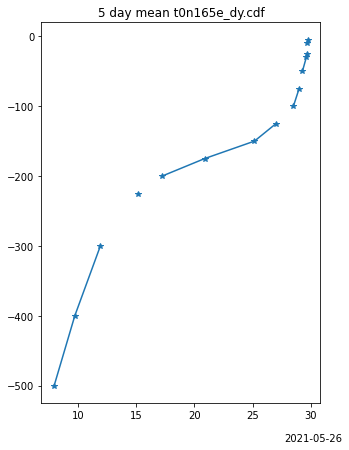

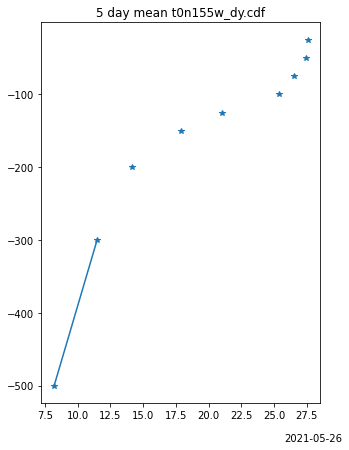

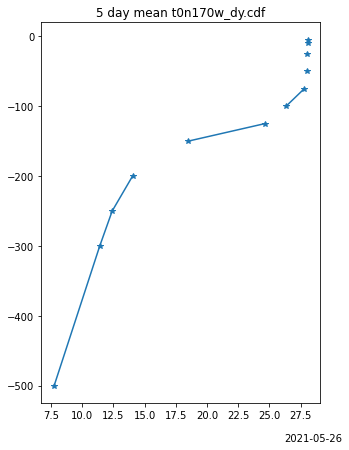

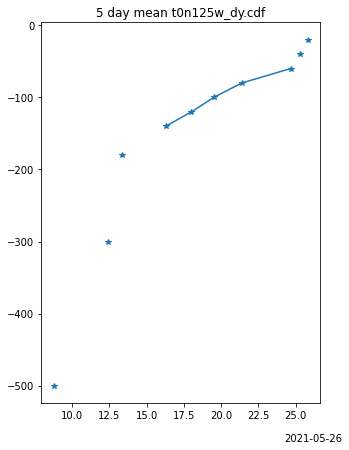

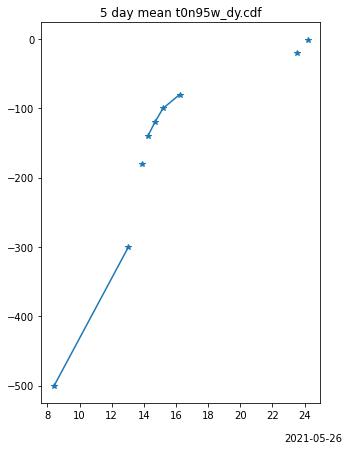

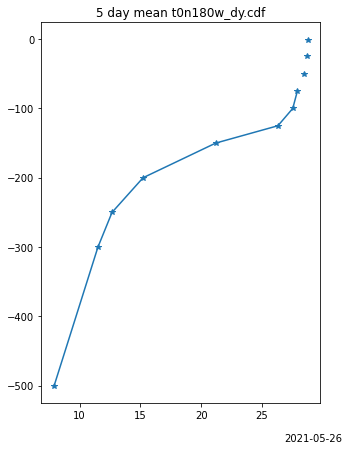

In [6]:
#select buoys by date
from netCDF4 import Dataset
import os 
import numpy as np
from datetime import date
import functools 
import datetime
import pandas as pd
import matplotlib.pyplot as plt


path0='/home/danliba/ArgoFloat/'
dir_list=os.listdir('/home/danliba/ArgoFloat/'); check= 't'
buoy_list = [idx for idx in dir_list if idx[0].lower() == check.lower()]
today = date.today()
dirName = 'data_'+str(today)
os.chdir('/home/danliba/ArgoFloat')
os.makedirs(dirName)    
        
savedir = '/home/danliba/ArgoFloat/'+dirName
os.chdir(savedir)

for kk in range(len(buoy_list)):
    fn=buoy_list[kk]
    print(fn)
    #fn='t0n110w_dy.cdf'
    data=Dataset(path0+fn)
    
    lat = data.variables['lat'][:]
    lon = data.variables['lon'][:]
    depth = data.variables['depth'][:]
    time = data.variables['time'][:]
    
    starting_date = data.variables['time'].units[11:21]
    
    temp = data.variables['T_20'][:][:,:,0,0]
    creation_day=data.variables['time'].units; yy=int(creation_day[11:15]); mm=int(creation_day[16:18]); dd=int(creation_day[19:21])
    fecha=time+np.array(date.toordinal(date(yy,mm,dd)))
    temp=np.array(temp,dtype='float32').T
    
    #start 5 days before today
    today = date.today()
    yesterday = today - datetime.timedelta(days=5)#5 dias atrás
    ytd=yesterday.strftime("%Y-%m-%d")
    
    yrst=int(ytd[0:4]); most=int(ytd[5:7]); dast=int(ytd[8:10])
    date_start=np.array(date.toordinal(date(yrst,most,dast)))
    find_stdate=np.where(fecha==date_start)
    fdt=functools.reduce(lambda sub, ele: sub * 10 + ele, find_stdate)
    
    if len(fdt)==0:
        print("Starting date is out of range")
        continue
    
    indx_date=int(fdt)
    fecha_inicio=fecha[indx_date:]; 
        
    ending_date = date.fromordinal(int(fecha_inicio[-1])) 
    date_range = pd.date_range(start= starting_date, end=ending_date)
        
    temp[temp==1.0000000e+35] = np.nan; sst=temp[:,indx_date:]
    
    sst_prom=np.nanmean(sst,1)
    fig=plt.figure(figsize=(5,7))
    plt.plot(sst_prom,-depth,marker='*')
    plt.title('5 day mean '+fn)
    plt.text(0.8, 0.05, str(ending_date),fontsize=10, transform=plt.gcf().transFigure)
    #boya_fn=np.concatenate((depth.reshape(-1,1),sst_prom.reshape(-1,1)),axis=1)
    #save the numpy array
    
    fn_save="SST-"+str(fn[:7])+".npz"
    np.savez(fn_save,depth=depth,sst=sst_prom,lon=lon,lat=lat)



In [ ]:
import sys
sys.modules[__name__].__dict__.clear()

In [218]:
#select_floats
from netCDF4 import Dataset
import netCDF4
import os 
import numpy as np
from datetime import date
import functools 
import datetime
import pandas as pd
import matplotlib.pyplot as plt

path0='/home/danliba/ArgoFloat/' 
dir_list=os.listdir('/home/danliba/ArgoFloat/'); check= '2'
floto_list = [idx for idx in dir_list if idx[0].lower() == check.lower()]
today = date.today()

dirName = 'data_'+str(today)
savedir = '/home/danliba/ArgoFloat/'+dirName
os.chdir(savedir)    
    
for kk in range(len(floto_list)):
    fn=floto_list[kk]
    #fn='t0n110w_dy.cdf'
    data=Dataset(path0+fn)
    
    lat = data.variables['LATITUDE'][:].T
    lon = data.variables['LONGITUDE'][:].T
    depth = data.variables['PRES'][:].T
    time = data.variables['JULD']
    jd = netCDF4.num2date(time[:],time.units)
    cycle_n=data.variables['CYCLE_NUMBER'][:]
    temp = data.variables['TEMP'][:].T
    sal = data.variables['PSAL_ADJUSTED'][:].T
    
    n_float_cum=[]
    
    for nflot in range(len(lon)):
        n_float=data.variables['PLATFORM_NUMBER'][nflot]
        dfloat=pd.DataFrame(n_float[0:6],columns=['Floto'])
        dfloat=dfloat['Floto'].str.decode("utf-8")
        dfloat=[dfloat[0],dfloat[1],dfloat[2],dfloat[3],dfloat[4],
                        dfloat[5]]
        dfloat=pd.DataFrame(dfloat).T
        df_flot = dfloat.iloc[:,0].map(str) + dfloat.iloc[:,1].map(str) + dfloat.iloc[:,2].map(str) + dfloat.iloc[:,3].map(str)+dfloat.iloc[:,4].map(str)+dfloat.iloc[:,5].map(str)
        n_float_cum.append(df_flot)
        
    number_floto=np.array(n_float_cum)
           
    starting_date = data.variables['JULD'].units[11:21]
    # plt.plot(lon,lat,color='black', linestyle='dashed',linewidth=0.1,marker='o',markerfacecolor='green',markersize=5)
    # plt.xlabel('Longitud')
    # plt.ylabel('Latitud')

    def argofloat_selection(x,y,T,S,D,NF,NC):
        range0=[140, 290, -1, 1]
        x=x.T; y=y.T
        
        x[x<0]=x[x<0]+360
        iter0=-1
        x0=[];x_cum=[]
        y0=[];y_cum=[]
        a=[];a_cum=[]
        for id in range(0,len(x),1):
            iter0=iter0+1
            
            if range0[0]<=x[id] and x[id]<=range0[1]:
                x0=True
                x_cum.append(x0)
            else:
                x0=False
                x_cum.append(x0)
                
            if range0[2]<=y[id] and y[id]<=range0[3]:
                y0=True
                y_cum.append(y0)
            else:
                y0=False
                y_cum.append(y0)
                
            if x_cum[id]==True and y_cum[id]==True:
                a=True
                a_cum.append(a)
            else:
                a=False
                a_cum.append(a)
                
        ab=np.array(a_cum)        
        indx_float=np.where(ab==True)
        indx_float=functools.reduce(lambda sub, ele: sub * 10 + ele, indx_float)
        lon1=x[indx_float]
        lat1=y[indx_float]
        temp1=T[:,indx_float]
        sal1=S[:,indx_float]
        depth1=D[:,indx_float]
        num_floto=NF[indx_float]
        num_cycle=NC[indx_float]
        return lon1,lat1,temp1,sal1,depth1,indx_float,num_floto,num_cycle
        
    [lon1,lat1,temp1,sal1,depth1,indx_float,num_floto,num_cycle]=argofloat_selection(lon,lat,temp,
                                                                                    sal,depth,number_floto,cycle_n)
   
    for istore in range(len(indx_float)):
       
       print(str(jd[-1])+'-----number of process-- '+ str(istore))
       tempi=temp1[:,istore]
       lati=lat1[istore]
       loni=lon1[istore]
       sali=sal[:,istore]
       depthi=depth1[:,istore]
       nfloto=np.array(num_floto[istore],dtype='int')
       ncycle=num_cycle[istore]
       timei=jd[-1]
       fn_save="SST-"+str(fn[:8])+'-lon-'+str(loni)+'-flotador_nº-'+str(nfloto)+'-ciclo-'+str(ncycle)+".npz"
       np.savez(fn_save,depth=depthi,sst=tempi,lon=loni,lat=lati,sal=sali,float_num=nfloto,cycle_num=ncycle,time=timei)


2021-06-03 00:14:18-----number of process-- 0
2021-06-02 00:00:39-----number of process-- 0
2021-06-02 00:00:39-----number of process-- 1
2021-06-02 00:00:39-----number of process-- 2
2021-06-01 00:02:08-----number of process-- 0
2021-06-01 00:02:08-----number of process-- 1
2021-05-31 00:19:14-----number of process-- 0
2021-05-31 00:19:14-----number of process-- 1
2021-05-31 00:19:14-----number of process-- 2
2021-05-31 00:19:14-----number of process-- 3
2021-05-31 00:19:14-----number of process-- 4
2021-05-31 00:19:14-----number of process-- 5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Text(0, 0.5, 'Latitud')

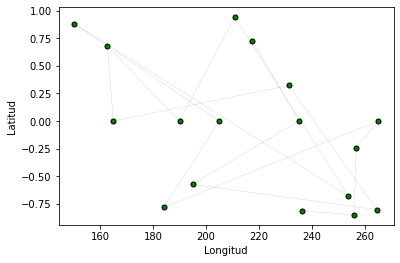

In [219]:
#lat and long
from netCDF4 import Dataset
import netCDF4
import os 
import numpy as np
from datetime import date
import functools 
import datetime
import pandas as pd
import matplotlib.pyplot as plt

today = date.today()
dirName = 'data_'+str(today)

path0='/home/danliba/ArgoFloat/'+dirName
dir_list=os.listdir('/home/danliba/ArgoFloat/'+dirName); check= 'S'
floto_list = [idx for idx in dir_list if idx[0].lower() == check.lower()]

os.chdir(path0)#change directory to path0
lati=[];loni=[];
for kk in range(len(floto_list)):
    fn=floto_list[kk]
    fns=np.load(fn,allow_pickle=True)
       
    lat = fns['lat']
    lon = fns['lon']
    
    lati.append(lat); loni.append(lon);

lati=np.array(lati); loni=np.array(loni)
plt.plot(loni,lati,color='black', linestyle='dashed',linewidth=0.1,marker='o',markerfacecolor='green',markersize=5)
plt.xlabel('Longitud')
plt.ylabel('Latitud')

In [3]:
#floto equatorial
from netCDF4 import Dataset
import netCDF4
import os 
import numpy as np
from datetime import date
import functools 
import datetime
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp2d

today = date.today()
dirName = 'data_'+str(today)
#dirName = 'data_2021-04-05'
path0='/home/danliba/ArgoFloat/'+dirName
dir_list=os.listdir('/home/danliba/ArgoFloat/'+dirName); check= 'S'
floto_list = [idx for idx in dir_list if idx[0].lower() == check.lower()]

os.chdir(path0)#change directory to path0
lati=[];lono=[];
temp_cum=np.zeros((297,int(len(floto_list))))
pres_cum=np.zeros((297,int(len(floto_list))))
lon_cum=np.zeros((297,int(len(floto_list))))

for kk in range(0,len(floto_list),1):
    fn=floto_list[kk]
    fns=np.load(fn,allow_pickle=True)
       
    lat = fns['lat']
    lon = fns['lon'] 
    depth=fns['depth']
    temp=fns['sst']
    loni,depi = np.meshgrid(lon,depth)
    lono.append(lon);
    data=[depth,temp,loni]
    df=pd.DataFrame(data).T
    
    # # sal_cum=np.zeros((310,int(len(data_cum))))
    # for kk in range(0,len(floto_list),1):
    #     #print(kk)
    ik=-1
    for iz in range(4,300+1,1):
        #print(iz)
    
        indx=np.where(np.array(df[0],dtype=int)==iz)
        indx=pd.DataFrame(functools.reduce(lambda sub, ele: sub * 10 + ele, indx))
        indx_data=np.array(indx)   
        ik=ik+1
        if len(indx_data)>1 :
            indx_data=indx[0]
        if len(indx[0])==1:
            #print('list is not empty')
            pres_cum[ik,kk]=np.around(df[0][int(indx_data)])
            temp_cum[ik,kk]=df[1][int(indx_data)]
            lon_cum[ik,kk]=df[2][int(indx_data)]
        else:
            pres_cum[ik,kk]=float('nan')
            temp_cum[ik,kk]=float('nan')
            lon_cum[ik,kk]=float('nan')

    print(fn+'-was succesfully processed')

lono=np.array(lono,dtype='float')
order = np.argsort(lono)
lonos=lono[order]
tempo=temp_cum[:,order]
preso=pres_cum[:,order]

#valores no repetidos
q=1 * np.round(lonos/1)
lon_uni=np.unique(q, return_index=True, return_inverse=True, return_counts=True, axis=None)
lon_unique=lon_uni[0]
sst_unique=tempo[:,lon_uni[1]]

Y=np.array(list(range(4,300+1,1)))

##interpolacion
from scipy import interpolate
array2=sst_unique
x2=lon_unique
y2=Y
array2=np.ma.masked_invalid(array2)

xx2,yy2=np.meshgrid(x2,y2)
x12=xx2[~array2.mask]
y12=yy2[~array2.mask]

newarr2= array2[~array2.mask]

GD2=interpolate.griddata((x12,y12),newarr2.ravel(),(xx2,yy2),
                         method='linear')

##ploteo
# lon5=5*np.round(lon_unique[0]/5)
# l1=list(range(int(lon5),180+5,5))
# l2=list(range(-175,int(lon_unique[-1])-360+5,5))
# listlon=l1+l2
# listax=list(range(int(lon5),int(lon_unique[-1])+5,5))
# depthax=list(range(-300,-0,20))

# fig,ax= plt.subplots(figsize=(15,5))
# vmin=8; vmax=32; step=1;#colorscale
# #cs = plt.pcolormesh(lon_unique, -Y, GD2, vmin=vmin, vmax=vmax, cmap='jet', shading='flat')
# contours= plt.contourf(lon_unique, -Y, GD2,levels=20,cmap="RdBu_r")
# contour2= plt.contour(lon_unique, -Y, GD2,levels=[10,11,12,15,20,25,28,29,30],colors='black',linewidths=0.5)
# plt.clabel(contour2, inline=True,fmt = '%2.0f',fontsize=10)
# plt.ylim([-300,0])
# cb = plt.colorbar(contours, pad=0.02, orientation='vertical', fraction=0.1)
# cb.ax.locator_params(nbins=len(list(range(vmin,vmax,step))))
# cb.ax.tick_params(direction='out')
# cb.set_label('Temperature ($^\circ$C)')
# plt.title('Subsurface Temperature 1ºN-1ºS / 140ºE-95ºW')
# plt.text(0.8, 0.07, str(today),fontsize=10, transform=plt.gcf().transFigure)
# plt.text(0.71, 0.145, 'DALB '+str(today),color='white',fontsize=10, transform=plt.gcf().transFigure)
# plt.text(0.71, 0.175, 'Source:ARGO & TAO',color='white',fontsize=10, transform=plt.gcf().transFigure)
# plt.text(0.125, 0.145, 'DALB',fontsize=10, transform=plt.gcf().transFigure)

# plt.set_xlim=(lon5,lon_unique[-1])
# ax.set_xticks(listax)
# ax.set_yticks(depthax)
# ax.set_xticklabels(listlon)
# plt.savefig('/home/danliba/ArgoGraphs/'+dirName+'-SST'+'.png',
#     format='png', dpi=600, transparent=False)
# #plt.show()

SST-t0n125w.npz-was succesfully processed
SST-20210708-lon-225.132-flotador_nº-[590572]-ciclo-105.npz-was succesfully processed
SST-20210710-lon-229.796-flotador_nº-[590636]-ciclo-12.npz-was succesfully processed
SST-20210709-lon-146.476-flotador_nº-[290280]-ciclo-27.npz-was succesfully processed
SST-20210708-lon-251.376-flotador_nº-[390130]-ciclo-76.npz-was succesfully processed
SST-20210710-lon-157.567-flotador_nº-[590609]-ciclo-78.npz-was succesfully processed
SST-20210708-lon-218.44812-flotador_nº-[590451]-ciclo-366.npz-was succesfully processed
SST-20210710-lon-153.241-flotador_nº-[590603]-ciclo-158.npz-was succesfully processed
SST-20210709-lon-262.421-flotador_nº-[590493]-ciclo-163.npz-was succesfully processed
SST-20210708-lon-251.15800000000002-flotador_nº-[590531]-ciclo-102.npz-was succesfully processed
SST-t0n165e.npz-was succesfully processed
SST-20210712-lon-216.287-flotador_nº-[590473]-ciclo-175.npz-was succesfully processed
SST-t0n170w.npz-was succesfully processed
SST-2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.


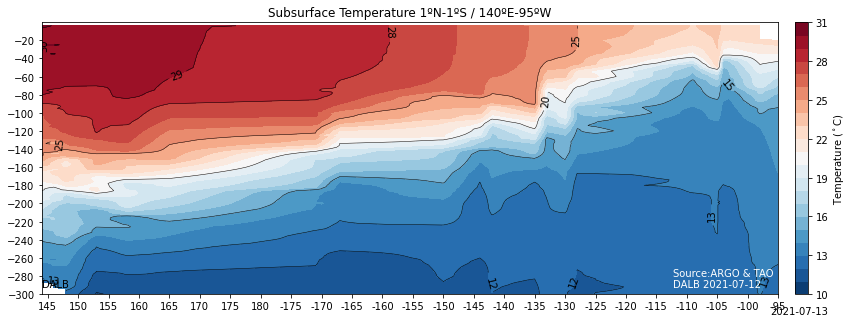

In [4]:
#tiempo 
yesterday0 = today - datetime.timedelta(days=1)#1 dias atrás
##PLOTEO
lon5=5*np.round(lon_unique[0]/5)
l1=list(range(int(lon5),180+5,5))
l2=list(range(-175,int(lon_unique[-1])-360+5,5))
listlon=l1+l2
listax=list(range(int(lon5),int(lon_unique[-1])+5,5))
depthax=list(range(-300,-0,20))

fig,ax= plt.subplots(figsize=(15,5))
vmin=8; vmax=32; step=1;#colorscale
#cs = plt.pcolormesh(lon_unique, -Y, GD2, vmin=vmin, vmax=vmax, cmap='jet', shading='flat')
contours= plt.contourf(lon_unique, -Y, GD2,levels=20,cmap="RdBu_r")
contour2= plt.contour(lon_unique, -Y, GD2,levels=[10,11,12,13,15,20,25,28,29,30],colors='black',linewidths=0.5)
plt.clabel(contour2, inline=True,fmt = '%2.0f',fontsize=10)
plt.ylim([-300,0])
cb = plt.colorbar(contours, pad=0.02, orientation='vertical', fraction=0.1)
cb.ax.locator_params(nbins=len(list(range(vmin,vmax,step))))
cb.ax.tick_params(direction='out')
cb.set_label('Temperature ($^\circ$C)')
plt.title('Subsurface Temperature 1ºN-1ºS / 140ºE-95ºW')
plt.text(0.8, 0.07, str(today),fontsize=10, transform=plt.gcf().transFigure)
plt.text(0.71, 0.145, 'DALB '+str(yesterday0),color='white',fontsize=10, transform=plt.gcf().transFigure)
plt.text(0.71, 0.175, 'Source:ARGO & TAO',color='white',fontsize=10, transform=plt.gcf().transFigure)
plt.text(0.125, 0.145, 'DALB',fontsize=10, transform=plt.gcf().transFigure)

plt.set_xlim=(lon5,lon_unique[-1])
ax.set_xticks(listax)
ax.set_yticks(depthax)
ax.set_xticklabels(listlon)
plt.savefig('/home/danliba/ArgoGraphs/'+dirName+'-SST'+'.png',
    format='png', dpi=600, transparent=False)
#plt.show()

In [5]:
#FLOTO EQUATORIAL SALT
from netCDF4 import Dataset
import netCDF4
import os 
import numpy as np
from datetime import date
import functools 
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import glob
from scipy.interpolate import interp2d

today = date.today()
dirName = 'data_'+str(today)
#dirName = 'data_2021-04-05'
path0='/home/danliba/ArgoFloat/'+dirName
dir_list=os.listdir('/home/danliba/ArgoFloat/'+dirName)
floto_list = glob.glob('SST-20*.npz')

os.chdir(path0)#change directory to path0
lati=[];lono=[];
sal_cum=np.zeros((297,int(len(floto_list))))
pres_cum=np.zeros((297,int(len(floto_list))))
lon_cum=np.zeros((297,int(len(floto_list))))

for kk in range(0,len(floto_list),1):
    fn=floto_list[kk]
    fns=np.load(fn,allow_pickle=True)
       
    lat = fns['lat']
    lon = fns['lon'] 
    depth=fns['depth']
    sal=fns['sal']
    loni,depi = np.meshgrid(lon,depth)
    lono.append(lon);
    data=[depth,sal,loni]
    df=pd.DataFrame(data).T
    
    # # sal_cum=np.zeros((310,int(len(data_cum))))
    # for kk in range(0,len(floto_list),1):
    #     #print(kk)
    ik=-1
    for iz in range(4,300+1,1):
        #print(iz)
    
        indx=np.where(np.array(df[0],dtype=int)==iz)
        indx=pd.DataFrame(functools.reduce(lambda sub, ele: sub * 10 + ele, indx))
        indx_data=np.array(indx)   
        ik=ik+1
        if len(indx_data)>1 :
            indx_data=indx[0]
        if len(indx[0])==1:
            #print('list is not empty')
            pres_cum[ik,kk]=np.around(df[0][int(indx_data)])
            sal_cum[ik,kk]=df[1][int(indx_data)]
            lon_cum[ik,kk]=df[2][int(indx_data)]
        else:
            pres_cum[ik,kk]=float('nan')
            sal_cum[ik,kk]=float('nan')
            lon_cum[ik,kk]=float('nan')

    print(fn+'-was succesfully processed')

sal_cum[sal_cum>37] = np.nan
sal_cum[sal_cum<32] = np.nan    
lono=np.array(lono,dtype='float')
order = np.argsort(lono)
lonos=lono[order]
salo=sal_cum[:,order]
preso=pres_cum[:,order]

#valores no repetidos
q=1 * np.round(lonos/1)
lon_uni=np.unique(q, return_index=True, return_inverse=True, return_counts=True, axis=None)
lon_unique=lon_uni[0]
sal_unique=salo[:,lon_uni[1]]

Y=np.array(list(range(4,300+1,1)))

##interpolacion
from scipy import interpolate
array2=sal_unique
x2=lon_unique
y2=Y
array2=np.ma.masked_invalid(array2)

xx2,yy2=np.meshgrid(x2,y2)
x12=xx2[~array2.mask]
y12=yy2[~array2.mask]

newarr2= array2[~array2.mask]

GD_sal=interpolate.griddata((x12,y12),newarr2.ravel(),(xx2,yy2),
                         method='cubic')

##ploteo
# lon5=5*np.round(lon_unique[0]/5)
# l1=list(range(int(lon5),180+5,5))
# l2=list(range(-175,int(lon_unique[-1])-360+5,5))
# listlon=l1+l2
# listax=list(range(int(lon5),int(lon_unique[-1])+5,5))
# depthax=list(range(-300,-0,20))

# fig,ax= plt.subplots(figsize=(15,5))
# vmin=8; vmax=32; step=1;#colorscale
# #cs = plt.pcolormesh(lon_unique, -Y, GD2, vmin=vmin, vmax=vmax, cmap='jet', shading='flat')
# contours= plt.contourf(lon_unique, -Y, GD2,levels=20,cmap="RdBu_r")
# contour2= plt.contour(lon_unique, -Y, GD2,levels=[10,11,12,15,20,25,28,29,30],colors='black',linewidths=0.5)
# plt.clabel(contour2, inline=True,fmt = '%2.0f',fontsize=10)
# plt.ylim([-300,0])
# cb = plt.colorbar(contours, pad=0.02, orientation='vertical', fraction=0.1)
# cb.ax.locator_params(nbins=len(list(range(vmin,vmax,step))))
# cb.ax.tick_params(direction='out')
# cb.set_label('Temperature ($^\circ$C)')
# plt.title('Subsurface Temperature 1ºN-1ºS / 140ºE-95ºW')
# plt.text(0.8, 0.07, str(today),fontsize=10, transform=plt.gcf().transFigure)
# plt.text(0.71, 0.145, 'DALB '+str(today),color='white',fontsize=10, transform=plt.gcf().transFigure)
# plt.text(0.71, 0.175, 'Source:ARGO & TAO',color='white',fontsize=10, transform=plt.gcf().transFigure)
# plt.text(0.125, 0.145, 'DALB',fontsize=10, transform=plt.gcf().transFigure)

# plt.set_xlim=(lon5,lon_unique[-1])
# ax.set_xticks(listax)
# ax.set_yticks(depthax)
# ax.set_xticklabels(listlon)
# plt.savefig('/home/danliba/ArgoGraphs/'+dirName+'-SST'+'.png',
#     format='png', dpi=600, transparent=False)
# #plt.show()

SST-20210708-lon-225.132-flotador_nº-[590572]-ciclo-105.npz-was succesfully processed
SST-20210710-lon-229.796-flotador_nº-[590636]-ciclo-12.npz-was succesfully processed
SST-20210709-lon-146.476-flotador_nº-[290280]-ciclo-27.npz-was succesfully processed
SST-20210708-lon-251.376-flotador_nº-[390130]-ciclo-76.npz-was succesfully processed
SST-20210710-lon-157.567-flotador_nº-[590609]-ciclo-78.npz-was succesfully processed
SST-20210708-lon-218.44812-flotador_nº-[590451]-ciclo-366.npz-was succesfully processed
SST-20210710-lon-153.241-flotador_nº-[590603]-ciclo-158.npz-was succesfully processed
SST-20210709-lon-262.421-flotador_nº-[590493]-ciclo-163.npz-was succesfully processed
SST-20210708-lon-251.15800000000002-flotador_nº-[590531]-ciclo-102.npz-was succesfully processed
SST-20210712-lon-216.287-flotador_nº-[590473]-ciclo-175.npz-was succesfully processed
SST-20210711-lon-257.259-flotador_nº-[590608]-ciclo-27.npz-was succesfully processed
SST-20210710-lon-189.029-flotador_nº-[490318]-

[Text(145, 0, '145'),
 Text(150, 0, '150'),
 Text(155, 0, '155'),
 Text(160, 0, '160'),
 Text(165, 0, '165'),
 Text(170, 0, '170'),
 Text(175, 0, '175'),
 Text(180, 0, '180'),
 Text(185, 0, '-175'),
 Text(190, 0, '-170'),
 Text(195, 0, '-165'),
 Text(200, 0, '-160'),
 Text(205, 0, '-155'),
 Text(210, 0, '-150'),
 Text(215, 0, '-145'),
 Text(220, 0, '-140'),
 Text(225, 0, '-135'),
 Text(230, 0, '-130'),
 Text(235, 0, '-125'),
 Text(240, 0, '-120'),
 Text(245, 0, '-115'),
 Text(250, 0, '-110'),
 Text(255, 0, '-105'),
 Text(260, 0, '-100'),
 Text(265, 0, '-95')]

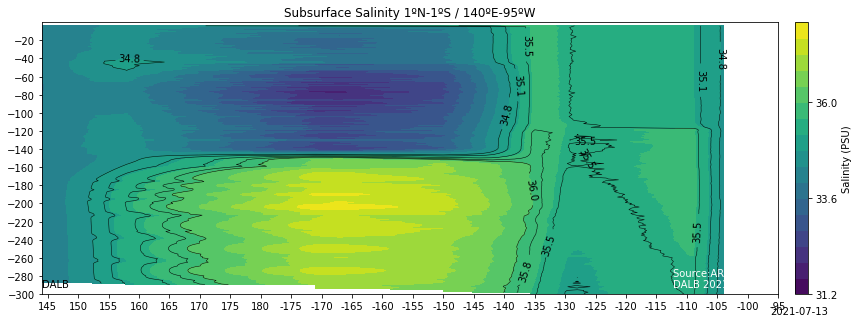

In [6]:
#tiempo 
yesterday0 = today - datetime.timedelta(days=1)#1 dias atrás
##PLOTEO
lon5=5*np.round(lon_unique[0]/5)
l1=list(range(int(lon5),180+5,5))
l2=list(range(-175,int(lon_unique[-1])-360+5,5))
listlon=l1+l2
listax=list(range(int(lon5),int(lon_unique[-1])+5,5))
depthax=list(range(-300,-0,20))

fig,ax= plt.subplots(figsize=(15,5))
vmin=33; vmax=36; step=1;#colorscale
#cs = plt.pcolormesh(lon_unique, -Y, GD2, vmin=vmin, vmax=vmax, cmap='jet', shading='flat')
contours= plt.contourf(lon_unique, -Y, GD_sal,levels=20,cmap="viridis")
contour2= plt.contour(lon_unique, -Y, GD_sal,levels=[34.8,35.1,35.5,35.8,36],colors='black',linewidths=0.5)
plt.clabel(contour2, inline=True,fmt = '%2.1f',fontsize=10)
plt.ylim([-300,0])
cb = plt.colorbar(contours, pad=0.02, orientation='vertical', fraction=0.1)
cb.ax.locator_params(nbins=len(list(range(vmin,vmax,step))))
cb.ax.tick_params(direction='out')
cb.set_label('Salinity (PSU)')
plt.title('Subsurface Salinity 1ºN-1ºS / 140ºE-95ºW')
plt.text(0.8, 0.07, str(today),fontsize=10, transform=plt.gcf().transFigure)
plt.text(0.71, 0.145, 'DALB '+str(yesterday0),color='white',fontsize=10, transform=plt.gcf().transFigure)
plt.text(0.71, 0.175, 'Source:ARGO & TAO',color='white',fontsize=10, transform=plt.gcf().transFigure)
plt.text(0.125, 0.145, 'DALB',fontsize=10, transform=plt.gcf().transFigure)

plt.set_xlim=(lon5,lon_unique[-1])
ax.set_xticks(listax)
ax.set_yticks(depthax)
ax.set_xticklabels(listlon)
#plt.savefig('/home/danliba/ArgoGraphs/'+dirName+'-Sal'+'.png',
 #   format='png', dpi=600, transparent=False)
#plt.show()

[Text(145, 0, '145'),
 Text(150, 0, '150'),
 Text(155, 0, '155'),
 Text(160, 0, '160'),
 Text(165, 0, '165'),
 Text(170, 0, '170'),
 Text(175, 0, '175'),
 Text(180, 0, '180'),
 Text(185, 0, '-175'),
 Text(190, 0, '-170'),
 Text(195, 0, '-165'),
 Text(200, 0, '-160'),
 Text(205, 0, '-155'),
 Text(210, 0, '-150'),
 Text(215, 0, '-145'),
 Text(220, 0, '-140'),
 Text(225, 0, '-135'),
 Text(230, 0, '-130'),
 Text(235, 0, '-125'),
 Text(240, 0, '-120'),
 Text(245, 0, '-115'),
 Text(250, 0, '-110'),
 Text(255, 0, '-105'),
 Text(260, 0, '-100'),
 Text(265, 0, '-95')]

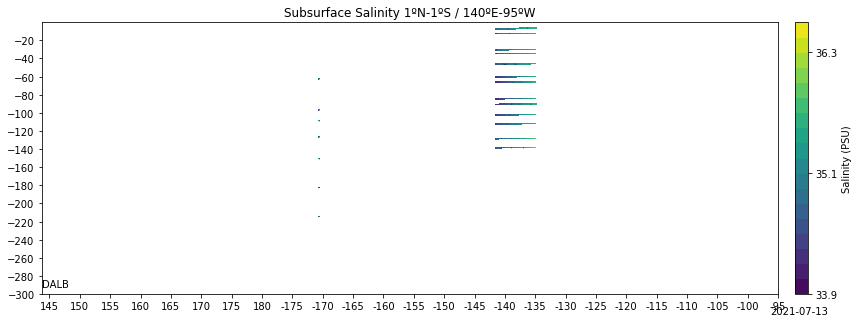

In [7]:
#tiempo 
yesterday0 = today - datetime.timedelta(days=1)#1 dias atrás
##PLOTEO
lon5=5*np.round(lon_unique[0]/5)
l1=list(range(int(lon5),180+5,5))
l2=list(range(-175,int(lon_unique[-1])-360+5,5))
listlon=l1+l2
listax=list(range(int(lon5),int(lon_unique[-1])+5,5))
depthax=list(range(-300,-0,20))

fig,ax= plt.subplots(figsize=(15,5))
vmin=33; vmax=36; step=1;#colorscale
#cs = plt.pcolormesh(lon_unique, -Y, GD2, vmin=vmin, vmax=vmax, cmap='jet', shading='flat')
contours= plt.contourf(lonos, -Y, salo,levels=20,cmap="viridis")
contour2= plt.contour(lonos, -Y, salo,levels=[34.8,35.1,35.5,35.8,36],colors='black',linewidths=0.5)
plt.clabel(contour2, inline=True,fmt = '%2.1f',fontsize=10)
plt.ylim([-300,0])
cb = plt.colorbar(contours, pad=0.02, orientation='vertical', fraction=0.1)
cb.ax.locator_params(nbins=len(list(range(vmin,vmax,step))))
cb.ax.tick_params(direction='out')
cb.set_label('Salinity (PSU)')
plt.title('Subsurface Salinity 1ºN-1ºS / 140ºE-95ºW')
plt.text(0.8, 0.07, str(today),fontsize=10, transform=plt.gcf().transFigure)
plt.text(0.71, 0.145, 'DALB '+str(yesterday0),color='white',fontsize=10, transform=plt.gcf().transFigure)
plt.text(0.71, 0.175, 'Source:ARGO & TAO',color='white',fontsize=10, transform=plt.gcf().transFigure)
plt.text(0.125, 0.145, 'DALB',fontsize=10, transform=plt.gcf().transFigure)

plt.set_xlim=(lon5,lon_unique[-1])
ax.set_xticks(listax)
ax.set_yticks(depthax)
ax.set_xticklabels(listlon)
#plt.savefig('/home/danliba/ArgoGraphs/'+dirName+'-Sal'+'.png',
 #   format='png', dpi=600, transparent=False)
#plt.show()

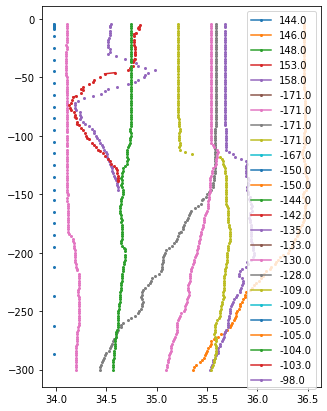

In [8]:
#lonos[lonos>180] = lonos-360
lonos_cum=np.zeros(int(len(lonos)))

for jj in range(0,len(lonos)):
    if lonos[jj]>180:
        lonos_cum[jj]=np.around(lonos[jj]-360)
        #print(jj)
    else:
        lonos_cum[jj]=np.around(lonos[jj])
##sal        
df_sal=pd.DataFrame(np.round(lonos))

fig=plt.figure(figsize=(5,7))
for jj in range(0,len(lonos)):
   
    plt.plot(salo[:,jj],-Y,marker='o',markersize=2)
    #plt.title(str(lonos_cum[jj]))

plt.legend(lonos_cum)

#plt.title(str(np.round(lono[jj])))

Text(0.85, 0.08, '2021-07-12')

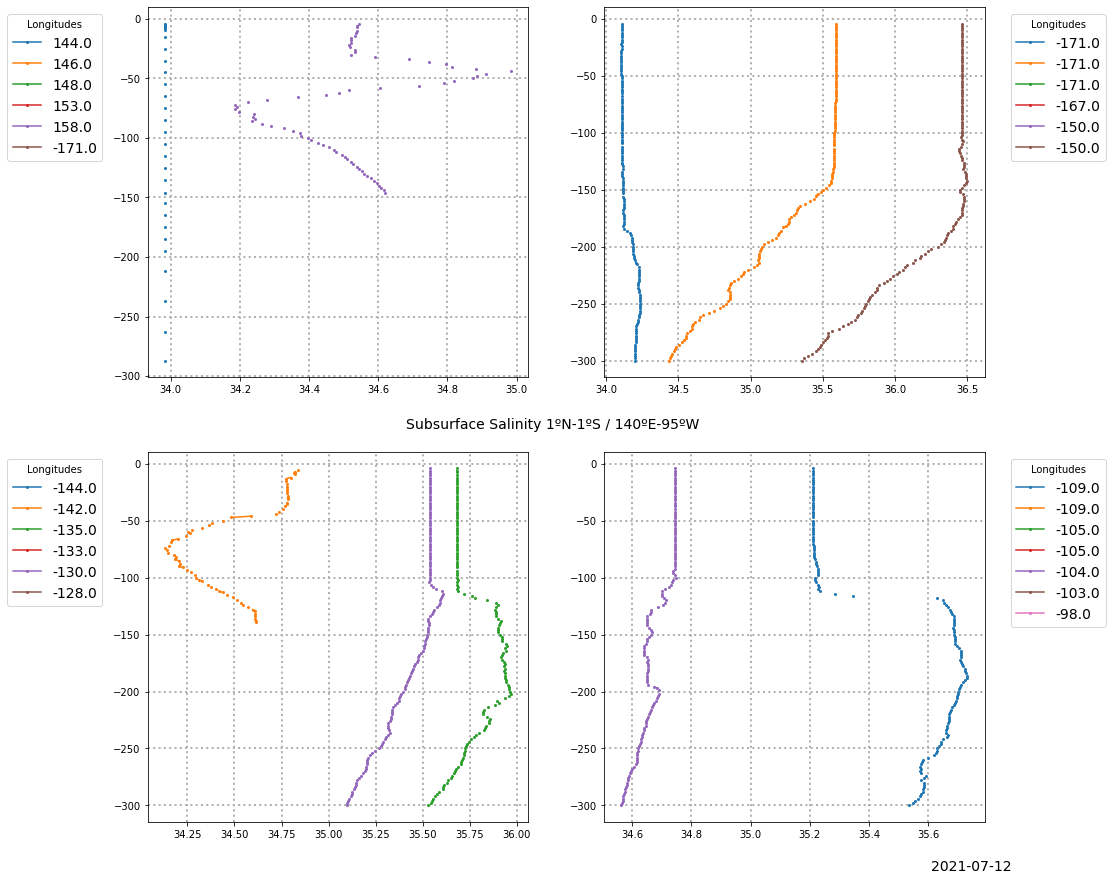

In [9]:
yesterday0 = today - datetime.timedelta(days=1)#1 dias atrás
nop=int(round(len(lonos_cum)/4)) #number of plots

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(15,15))
plt.suptitle("Subsurface Salinity 1ºN-1ºS / 140ºE-95ºW", fontsize=14,y=0.5)
#panel 1
for jj in range(0,nop):
   
    ax1.plot(salo[:,jj],-Y,marker='o',markersize=2)
    #plt.title(str(lonos_cum[jj]))

ax1.legend(lonos_cum[0:jj+1], bbox_to_anchor=(-0.1, 1), loc='upper right',title= 'Longitudes',fontsize=14)
ax1.grid( linestyle=':', linewidth=2)


#panel2
for jj in range(int(nop),nop+nop):
   
    ax2.plot(salo[:,jj],-Y,marker='o',markersize=2)
    #plt.title(str(lonos_cum[jj]))

ax2.legend(lonos_cum[nop:jj+1], bbox_to_anchor=(1.05, 1), loc='upper left',title= 'Longitudes',fontsize=14)
ax2.grid( linestyle=':', linewidth=2)

#panel 3
for jj in range(nop+nop,nop+nop+nop):
   
    ax3.plot(salo[:,jj],-Y,marker='o',markersize=2)
    #plt.title(str(lonos_cum[jj]))

ax3.legend(lonos_cum[nop+nop:jj+1], bbox_to_anchor=(-0.1, 1), loc='upper right',title= 'Longitudes',fontsize=14)
ax3.grid( linestyle=':', linewidth=2)

#panel 4
for jj in range(nop+nop+nop,len(lonos_cum)):
   
    ax4.plot(salo[:,jj],-Y,marker='o',markersize=2)
    #plt.title(str(lonos_cum[jj]))

ax4.legend(lonos_cum[nop+nop+nop:jj+1], bbox_to_anchor=(1.05, 1), loc='upper left',title= 'Longitudes',fontsize=14)
ax4.grid( linestyle=':', linewidth=2)

plt.text(0.85, 0.08, str(yesterday0),fontsize=14, transform=plt.gcf().transFigure)

# plt.savefig('/home/danliba/ArgoGraphs/'+dirName+'-Sal'+'.png',
#    format='png', dpi=600, transparent=False)
# plt.show()

#plt.legend(handles=[p1, p2], title='title', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
# fig.suptitle('Sharing x per column, y per row')
# ax1.plot(x, y)
# ax2.plot(x, y**2, 'tab:orange')
# ax3.plot(x, -y, 'tab:green')
# ax4.plot(x, -y**2, 'tab:red')

# for ax in fig.get_axes():
#     ax.label_outer()

In [150]:
## lonos[lonos>180] = lonos-360
# lonos_cum=np.zeros(int(len(lonos)))

# for jj in range(0,len(lonos)):
#     if lonos[jj]>180:
#         lonos_cum[jj]=np.around(lonos[jj]-360)
#         #print(jj)
#     else:
#         lonos_cum[jj]=np.around(lonos[jj])
#         #print(lonos_cum)

5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


In [227]:
nop

3

In [202]:
len(lonos_cum)

24

In [232]:
today

datetime.date(2021, 6, 8)